In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('MaintenanceR.csv', encoding = 'utf-8', sep = ',')
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
column_to_drop = ['UDI', 'Product ID']
for col in column_to_drop:
  data.drop(col, axis=1, inplace=True)

data.sample(10)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
2427,L,298.9,308.3,1855,23.8,33,0,0,0,0,0,0
7019,L,300.8,310.8,1741,27.1,39,0,0,0,0,0,0
5600,L,302.8,312.1,1487,36.6,84,0,0,0,0,0,0
3558,L,301.7,310.6,1743,26.2,71,0,0,0,0,0,0
5858,L,301.3,311.0,1348,44.5,78,0,0,0,0,0,0
1875,L,298.3,308.0,1363,50.1,96,0,0,0,0,0,0
1364,L,298.7,310.2,1566,33.1,68,0,0,0,0,0,0
3227,M,300.5,309.3,1589,34.9,91,0,0,0,0,0,0
4687,L,303.5,311.6,2183,17.0,110,0,0,0,0,0,0
7020,L,300.8,310.8,1460,53.8,41,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
 7   TWF                      10000 non-null  int64  
 8   HDF                      10000 non-null  int64  
 9   PWF                      10000 non-null  int64  
 10  OSF                      10000 non-null  int64  
 11  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB


In [5]:
data.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [6]:
data.nunique()

,0
Type,3
Air temperature [K],93
Process temperature [K],82
Rotational speed [rpm],941
Torque [Nm],577
Tool wear [min],246
Machine failure,2
TWF,2
HDF,2
PWF,2


In [7]:
# А есть ли пустые значения?
# data['Temperature[C]'] = data['Temperature[C]'].fillna(data['eCO2[ppm]'].median())
# data['Humidity[%]'] = data['Humidity[%]'].fillna(data['eCO2[ppm]'].mean())
data.isna().sum()

,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Machine failure,0
TWF,0
HDF,0
PWF,0


In [8]:
data.isnull().sum()

,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Machine failure,0
TWF,0
HDF,0
PWF,0


In [9]:
# Преобразовывем к другим типам данных
for col in data.columns:
    if data[col].dtype == 'float64':  # Проверяем, является ли тип данных float
        if (data[col] % 1 == 0).all():  # Проверяем, все ли значения в столбце целые
            data[col] = data[col].astype(int)  # Приводим к целочисленному
            print(f"Столбец '{col}' был приведен к типу int.")
        else:
            print(f"Столбец '{col}' содержит нецелые значения и не может быть приведен к типу int.")
    else:
        print(f"Столбец '{col}' не является типом float и не требует приведения к int.")

Столбец 'Type' не является типом float и не требует приведения к int.
Столбец 'Air temperature [K]' содержит нецелые значения и не может быть приведен к типу int.
Столбец 'Process temperature [K]' содержит нецелые значения и не может быть приведен к типу int.
Столбец 'Rotational speed [rpm]' не является типом float и не требует приведения к int.
Столбец 'Torque [Nm]' содержит нецелые значения и не может быть приведен к типу int.
Столбец 'Tool wear [min]' не является типом float и не требует приведения к int.
Столбец 'Machine failure' не является типом float и не требует приведения к int.
Столбец 'TWF' не является типом float и не требует приведения к int.
Столбец 'HDF' не является типом float и не требует приведения к int.
Столбец 'PWF' не является типом float и не требует приведения к int.
Столбец 'OSF' не является типом float и не требует приведения к int.
Столбец 'RNF' не является типом float и не требует приведения к int.


In [10]:
# Обогащение данных
data['Type'].value_counts()

,count
Type,
L,6000
M,2997
H,1003


In [11]:
data['Type'] = data['Type'].map({'L': 1, 'M': 2, 'H': 3})
data

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,3,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,2,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,3,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [12]:
# Добваляем новые термодинамические признаки
# ΔТемпература (delta_temp): Process temperature - Air temperature - gоказывает перегрев оборудования относительно среды. Высокие значения связаны с отказами.
# Относительный перегрев (rel_temp_ratio): (Process temperature - Air temperature) / Air temperature - нормированный показатель перегрева, учитывающий исходную температуру.
data['delta_temp'] = data['Process temperature [K]'] - data['Air temperature [K]']
data['rel_temp_ratio'] = data['delta_temp'] / data['Air temperature [K]']
data

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,delta_temp,rel_temp_ratio
0,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,10.5,0.035223
1,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,10.5,0.035211
2,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,10.4,0.034888
3,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,10.4,0.034876
4,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,10.5,0.035211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,9.6,0.032129
9996,3,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,9.5,0.031783
9997,2,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,9.6,0.032107
9998,3,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,9.7,0.032441


In [13]:
# Проверяем дубликаты и если они есть, то удаляем
data = data.drop_duplicates()

In [14]:
data.duplicated().sum()

np.int64(0)

In [15]:
# Исследование выбросов
columns=['delta_temp', 'rel_temp_ratio', 'Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','Machine failure','TWF',	'HDF',	'PWF',	'OSF',	'RNF']
data.describe()[columns]

,delta_temp,rel_temp_ratio,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,10.000630,0.033352,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,1.001094,0.003492,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,7.600000,0.025116,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,9.300000,0.030686,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,9.800000,0.032847,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,11.000000,0.036777,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,12.100000,0.040672,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


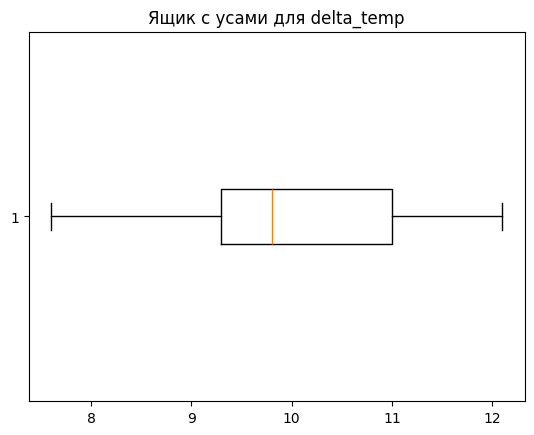

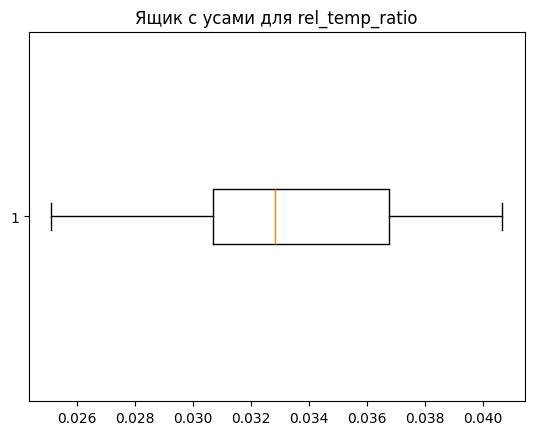

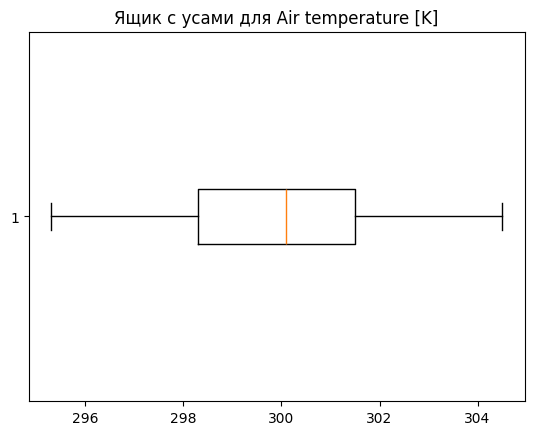

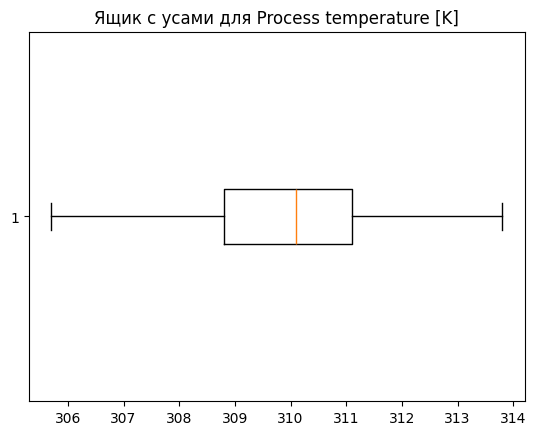

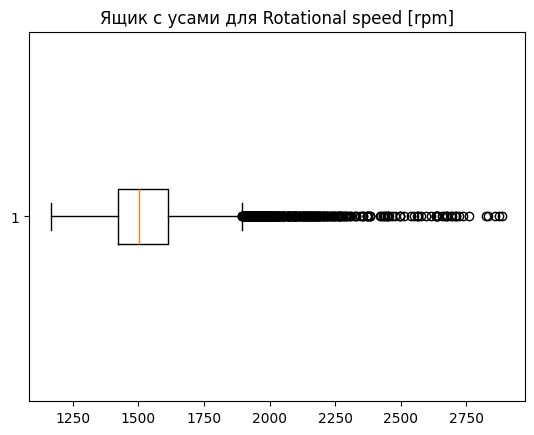

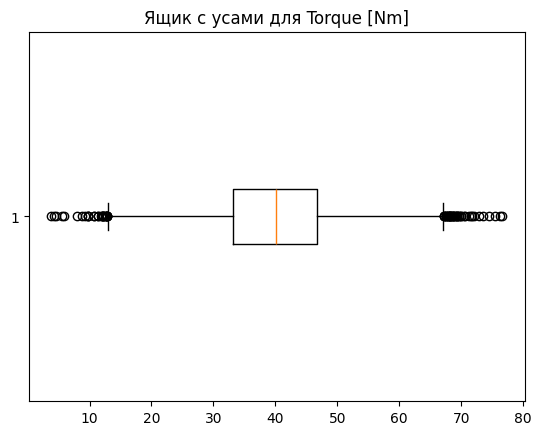

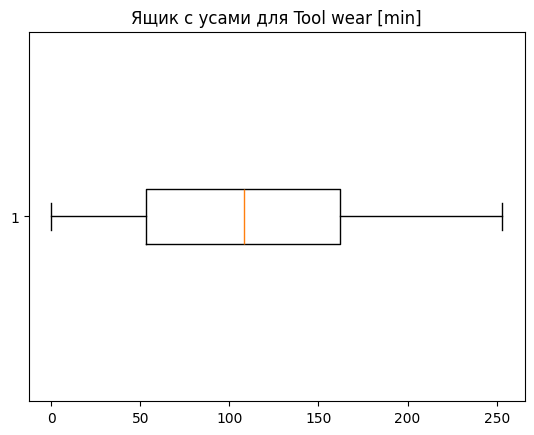

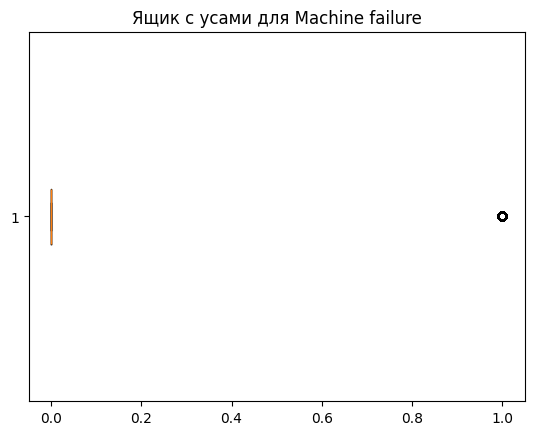

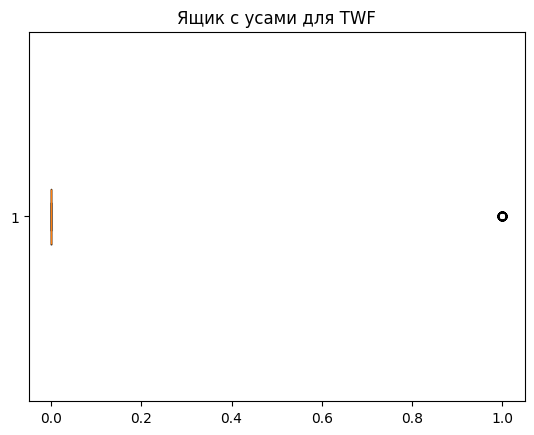

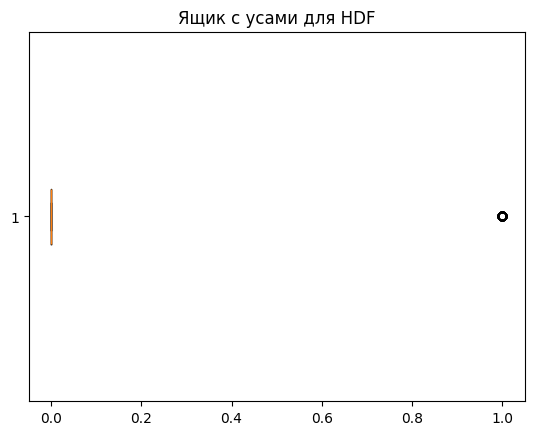

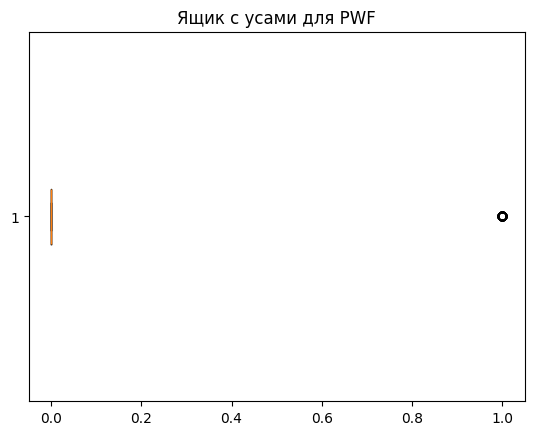

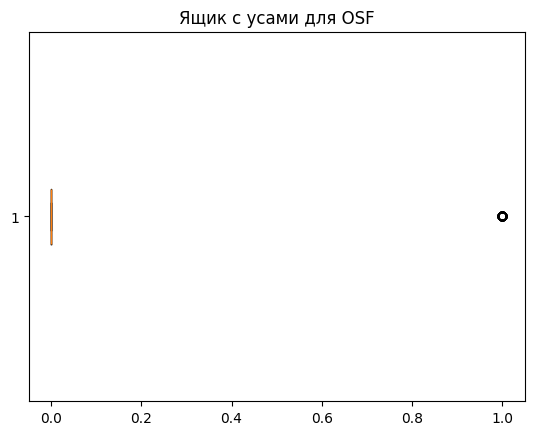

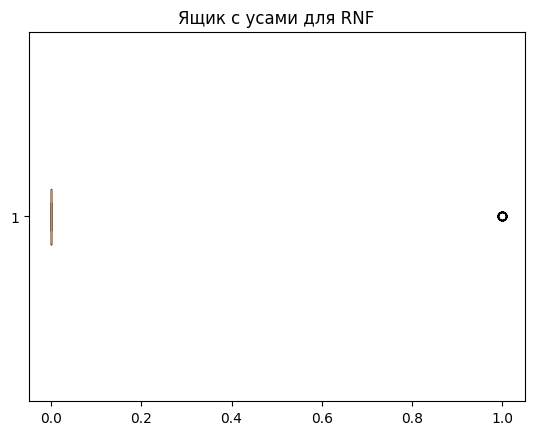

In [16]:
for column in columns:
  plt.figure()
  plt.title(f'Ящик с усами для {column}')
  plt.boxplot(data[column], vert=False)
  plt.show()

In [17]:
"""# Удаляем выбросы
# Верхние и нижние пределы выбросов
outlier = data[columns]
Q1 = outlier.quantile(0.1)
Q3 = outlier.quantile(0.9)

# IQR-оценки
IQR = Q3-Q1
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]

index_list = list(data_filtered.index.values)
data_filtered = data[data.index.isin(index_list)]
data_filtered.sample(5)"""

'# Удаляем выбросы\n# Верхние и нижние пределы выбросов\noutlier = data[columns]\nQ1 = outlier.quantile(0.1)\nQ3 = outlier.quantile(0.9)\n\n# IQR-оценки\nIQR = Q3-Q1\ndata_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]\n\nindex_list = list(data_filtered.index.values)\ndata_filtered = data[data.index.isin(index_list)]\ndata_filtered.sample(5)'

In [18]:
"""for col in columns:
    plt.figure(figsize=(10, 6))
    plt.hist(data[col], alpha=0.5, label='С выбросами', color='red')
    plt.hist(data_filtered[col], label='Без выбросов', color='blue')
    plt.title(f'Гистограмма для {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.legend()
    plt.grid()
    plt.show()"""

"for col in columns:\n    plt.figure(figsize=(10, 6))\n    plt.hist(data[col], alpha=0.5, label='С выбросами', color='red')\n    plt.hist(data_filtered[col], label='Без выбросов', color='blue')\n    plt.title(f'Гистограмма для {col}')\n    plt.xlabel(col)\n    plt.ylabel('Частота')\n    plt.legend()\n    plt.grid()\n    plt.show()"

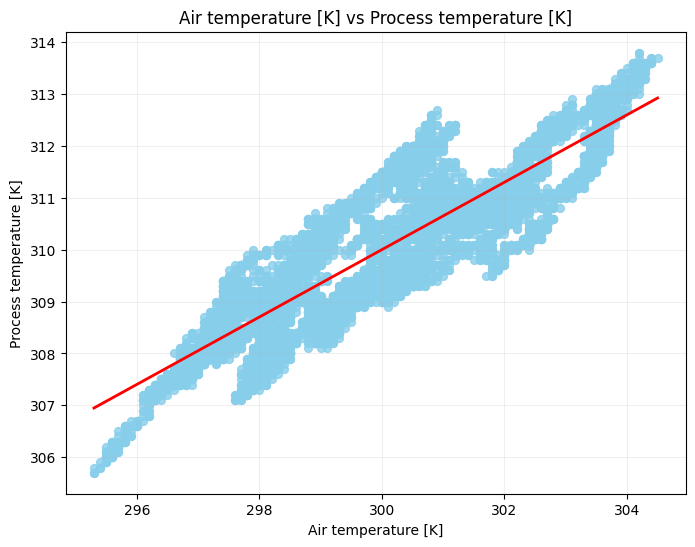

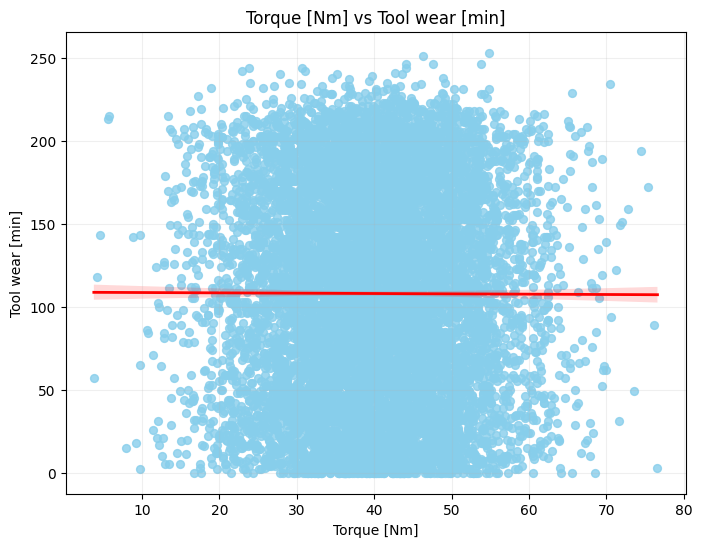

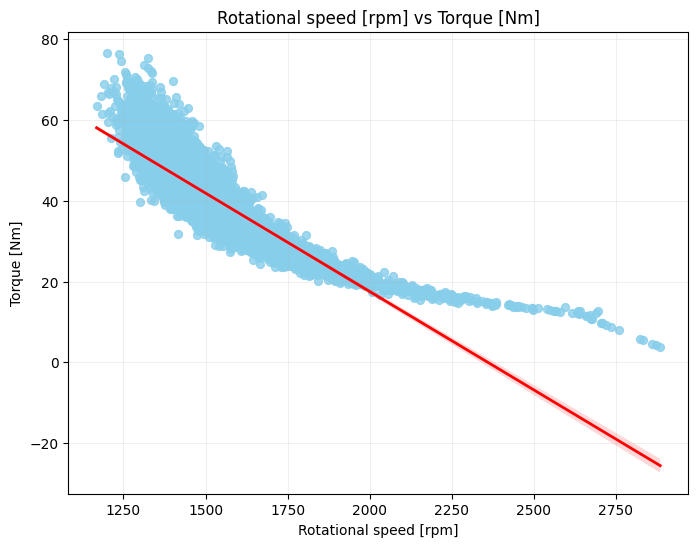

In [19]:
def plot_scatter(data, x, y):
    plt.figure(figsize=(8, 6))

    # Диаграмма рассеяния
    sns.regplot(x=x, y=y, data=data,
                scatter_kws={'s': 32, 'alpha': 0.8, 'color': 'skyblue'},
                line_kws={'color': 'red', 'linewidth': 2})

    plt.title(f'{x} vs {y}')
    plt.grid(alpha=0.2)
    plt.show()

# Примеры использования:
plot_scatter(data, 'Air temperature [K]', 'Process temperature [K]')
plot_scatter(data, 'Torque [Nm]', 'Tool wear [min]')
plot_scatter(data, 'Rotational speed [rpm]', 'Torque [Nm]')

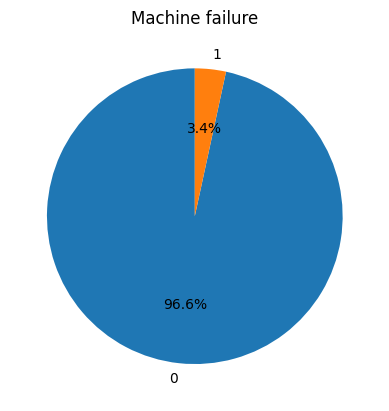

In [20]:
counts = data['Machine failure'].value_counts()
plt.figure()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Machine failure')
plt.show()

<Axes: title={'center': 'Type'}, ylabel='Frequency'>

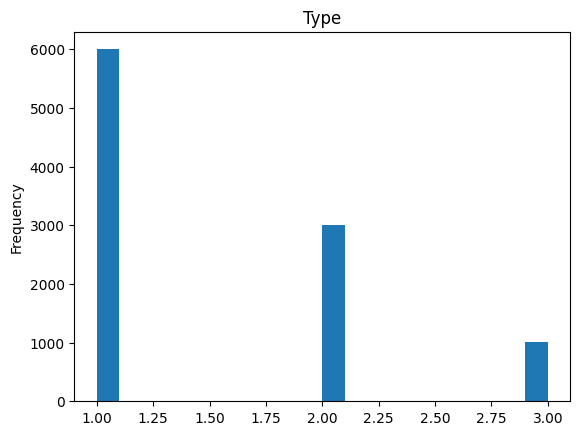

In [21]:
data['Type'].plot(kind='hist', bins=20, title='Type')

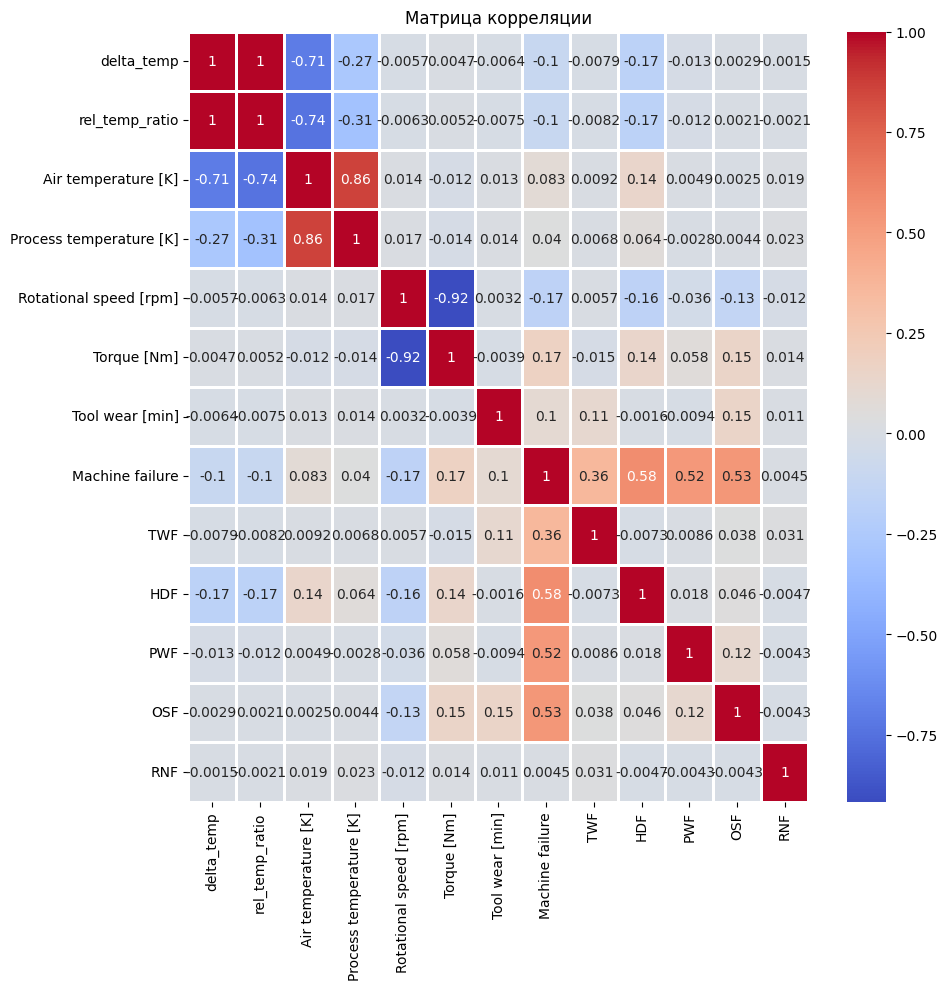

In [22]:
columns=['delta_temp', 'rel_temp_ratio', 'Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','Machine failure','TWF',	'HDF',	'PWF',	'OSF',	'RNF']
plt.figure(figsize = (10,10))
df_selected = data[columns]
corr = df_selected.corr(method='spearman')
sns.heatmap(corr, annot=True, linewidths=1, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

**Линейная регрессия с регуляризацией (Ridge, Lasso, ElasticNet)**
- Когда применять?
1. Данные имеют линейную зависимость между признаками и целевой переменной.
2. Присутствует мультиколлинеарность (коррелирующие признаки) → Ridge регрессия (L2-регуляризация).
3. Есть ненужные признаки → Lasso (L1-регуляризация) автоматически обнуляет некоторые веса.
4. Нужен баланс между L1 и L2 → ElasticNet.
5. Размер данных небольшой или средний (не подходит для очень больших данных, так как требует вычисления матриц).
- Что искать в EDA?
1. Проверить корреляцию признаков между собой (тепловая карта корреляции).
2. Посмотреть на распределение целевой переменной (если оно нормальное, линейная регрессия может работать хорошо).
3. Проверить линейность связи (графики sns.pairplot, sns.regplot).
3. Если признаки имеют разный масштаб → нужна стандартизация (StandardScaler).
**Решающие деревья (Decision Trees)**
- Когда применять?
1. Данные имеют нелинейные зависимости.
2. Есть категориальные признаки (деревья умеют работать без one-hot encoding).
3. Нужна интерпретируемость (можно визуализировать дерево).
4. Мало данных (случайный лес и бустинг могут переобучиться на малых данных).
5. Есть выбросы (деревья устойчивы к ним).
- Что искать в EDA?
1. Проверить нелинейность зависимостей (если линейные модели дают плохие результаты).
2. Посмотреть на выбросы (деревья их не боятся).
3. Если признаки имеют сложные взаимодействия (деревья могут их уловить).
**Случайный лес (Random Forest)**
- Когда применять?
1. Данные сложные, с нелинейными зависимостями.
2. Нужна устойчивость к переобучению (благодаря бэггингу).
3. Есть шум и выбросы (лес усредняет предсказания деревьев).
4. Размер данных средний или большой (но не гигантский).
- Что искать в EDA?
1. Если линейные модели плохо работают, а одно дерево переобучается → попробовать лес.
2. Если в данных есть много взаимодействий между признаками.
**Градиентный бустинг**
- Когда применять?
1. Данные большие и сложные (бустинг часто побеждает на соревнованиях).
2. Нужна максимальная точность (если правильно настроить).
3. Есть категориальные признаки.
4. Много пропусков и шума (бустинг устойчивее, чем случайный лес).
- Что искать в EDA?
1. Если случайный лес даёт хорошие результаты, но хочется лучше → пробуем бустинг.
2. Если в данных есть сложные нелинейные паттерны, которые не ловят другие модели.
**Стекинг (Stacking)**
- Когда применять?
1. Когда ансамбли (лес, бустинг) уже работают хорошо, но хочется выжать максимум.
2. Есть время и ресурсы для обучения нескольких моделей.
3. Размер данных не слишком большой (стэкинг требует много вычислений).
- Что искать в EDA?
Если разные модели дают разные ошибки (например, линейная модель ошибается на одних данных, а лес — на других), то стекинг может улучшить результат.
**Бэггинг (Bagging)**
- Когда применять?
1. Когда одна модель (например, дерево) склонна к переобучению.
2. Нужно уменьшить дисперсию ошибки (бэггинг усредняет предсказания).
3. Данные среднего размера (как и в случае случайного леса).
- Что искать в EDA?
Если одно дерево или другая простая модель сильно переобучается → бэггинг может помочь.

**Вывод: как по EDA выбрать модель?**
1. Проверить линейность:
Если зависимости линейные → пробуем линейную регрессию (+ регуляризацию, если много признаков).
Если нелинейные → деревья, лес, бустинг.
2. Размер данных:
Мало данных → деревья или линейные модели.
Много данных → случайный лес, бустинг.
3. Наличие выбросов:
Если много выбросов → деревья, лес, бустинг.
4. Категориальные признаки:
Если их много → градиентный бустинг или случайный лес.
5. Мультиколлинеарность:
Если признаки коррелируют → Ridge или ElasticNet.

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor, BaggingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.pipeline import Pipeline
import joblib

In [24]:
# Выделяем целевую переменную и предикторы
df = data
label = 'Air temperature [K]'
features = ['delta_temp', 'rel_temp_ratio', 'Machine failure', 'Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','TWF',	'HDF',	'PWF',	'OSF',	'RNF']
X,y = df[features].values, df[label].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Применение PCA
from sklearn.decomposition import PCA

# Делаем, чтобы объяснить 95% дисперсии
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Исходное количество признаков: {X_train_scaled.shape[1]}")
print(f"Количество главных компонент после PCA: {X_train_pca.shape[1]}")

Исходное количество признаков: 11
Количество главных компонент после PCA: 8


In [26]:
results_df = pd.DataFrame(columns=['Model', 'MSE', 'R2', 'MAE', 'RMSE', 'MAPE', 'Best Parameters'])

# Функция для добавления результатов модели
def add_results(model_name, y_true, y_pred, params=None):
    metrics = {
        'Model': model_name,
        'MSE': mean_squared_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred),
        'Best Parameters': str(params) if params else None
    }
    return metrics


--- Ridge ---
Лучшие параметры: {'alpha': 0.01}
R2: 1.0000
MAE: 0.0027
MSE: 0.0000
RMSE: 0.0033
MAPE: 0.0000


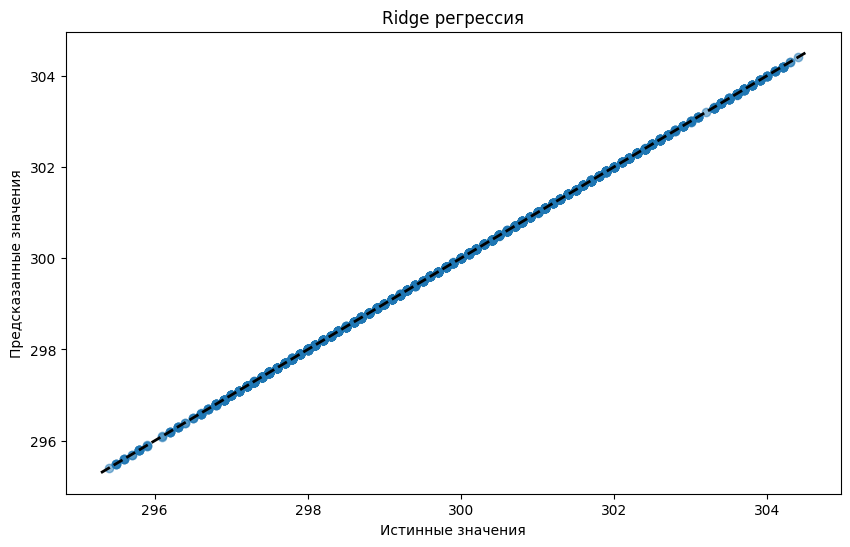


--- Lasso ---
Лучшие параметры: {'alpha': 0.01}
R2: 0.9998
MAE: 0.0210
MSE: 0.0007
RMSE: 0.0267
MAPE: 0.0001


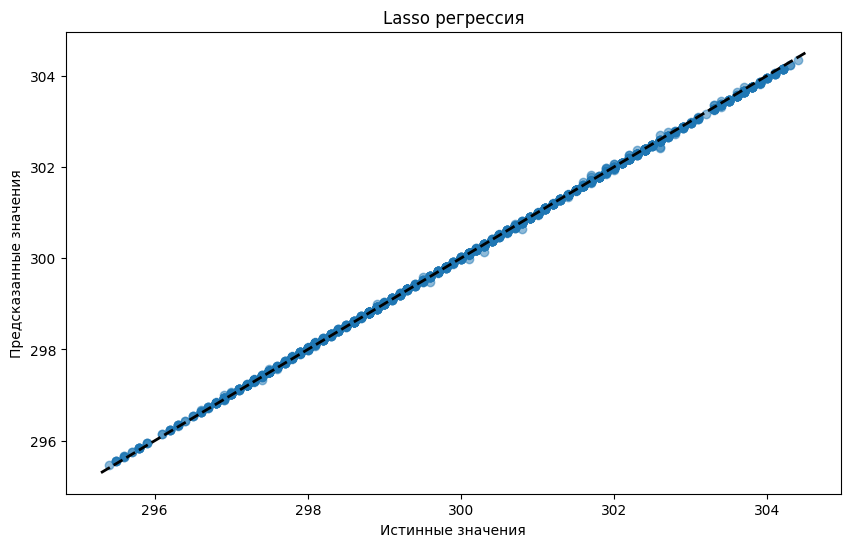


--- ElasticNet ---
Лучшие параметры: {'alpha': 0.01, 'l1_ratio': 0.1}
R2: 0.9999
MAE: 0.0129
MSE: 0.0002
RMSE: 0.0157
MAPE: 0.0000


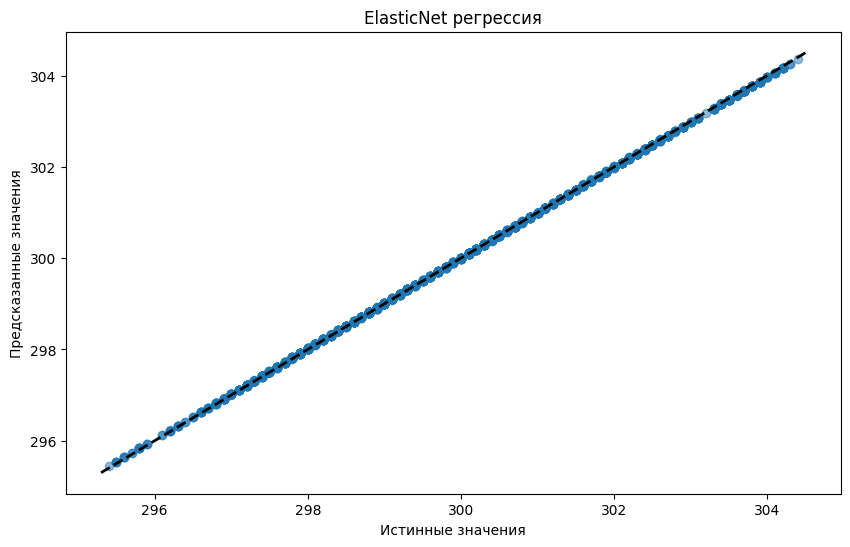

In [29]:
# Регрессия с регуляризацией (Ridge, Lasso, ElasticNet)
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

params = {
    'Ridge': {'alpha': [0.01, 0.1]},
    'Lasso': {'alpha': [0.01, 0.1]},
    'ElasticNet': {'alpha': [0.01, 0.1], 'l1_ratio': [0.1, 0.5]}
}

for name, model in models.items():
    print(f"\n--- {name} ---")
    gs = GridSearchCV(model, params[name], cv=5, scoring='r2')
    gs.fit(X_train_pca, y_train)
    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test_pca)

    new_row = pd.DataFrame([add_results(name, y_test, y_pred, gs.best_params_)])
    results_df = pd.concat([results_df, new_row], ignore_index=True)

    # Метрики
    print(f"Лучшие параметры: {gs.best_params_}")
    print(f"R2: {r2_score(y_test, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
    print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred):.4f}")

    # График
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.title(f'{name} регрессия')
    plt.show()


--- Decision Tree  ---
Лучшие параметры: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5}
R2: 0.9852
MAE: 0.1089
MSE: 0.0589
RMSE: 0.2427
MAPE: 0.0004


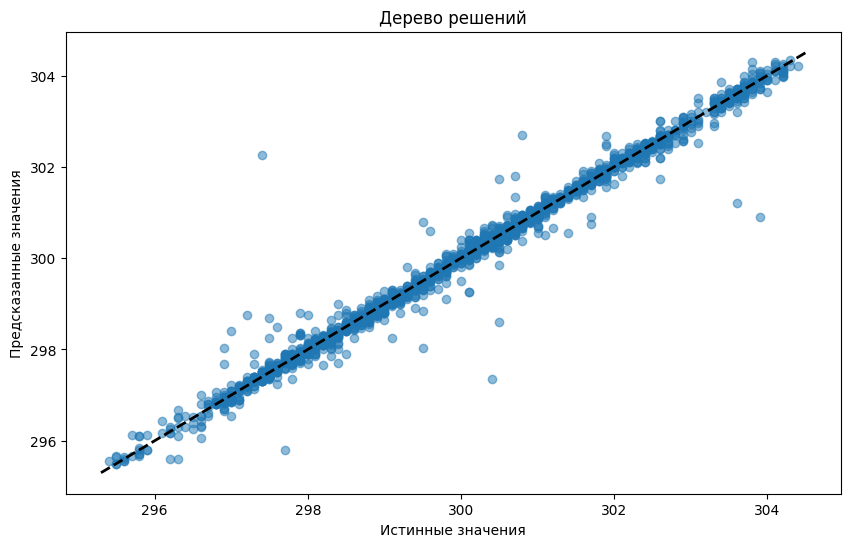

In [30]:
# Дерево решений
tree_params = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree = DecisionTreeRegressor(random_state=42)
gs_tree = GridSearchCV(tree, tree_params, cv=5, scoring='r2')
gs_tree.fit(X_train_pca, y_train)
best_tree = gs_tree.best_estimator_
y_pred = best_tree.predict(X_test_pca)

new_row = pd.DataFrame([add_results('Decision Tree', y_test, y_pred, gs_tree.best_params_)])
results_df = pd.concat([results_df, new_row], ignore_index=True)

# Метрики
print(f"\n--- Decision Tree  ---")
print(f"Лучшие параметры: {gs_tree.best_params_}")
print(f"R2: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred):.4f}")

# График
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Дерево решений')
plt.show()

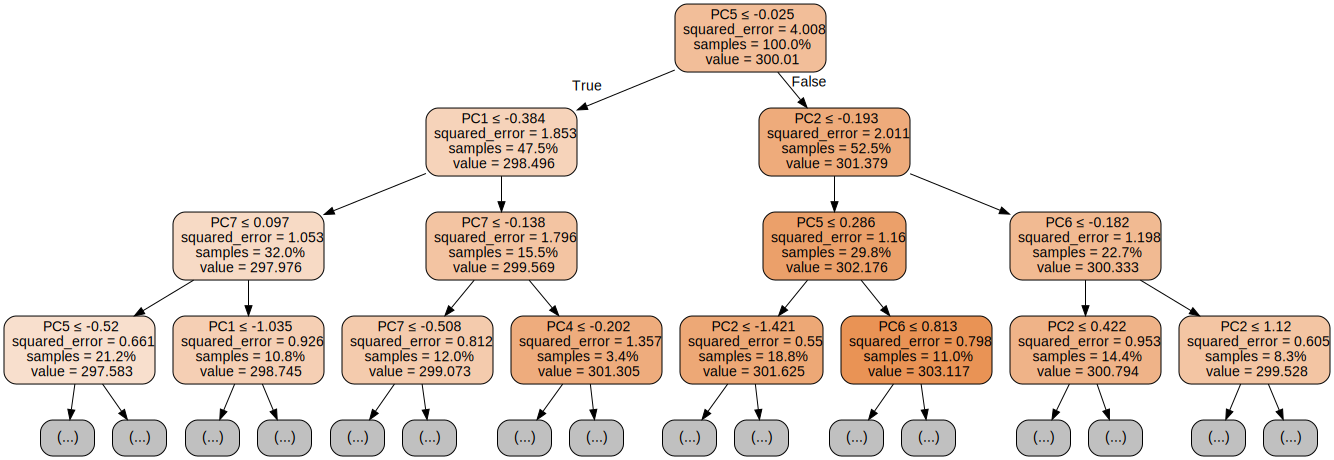


Правила дерева (первые 3 уровня):
|--- PC5 <= -0.02
|   |--- PC1 <= -0.38
|   |   |--- PC7 <= 0.10
|   |   |   |--- PC5 <= -0.52
|   |   |   |   |--- truncated branch of depth 12
|   |   |   |--- PC5 >  -0.52
|   |   |   |   |--- truncated branch of depth 15
|   |   |--- PC7 >  0.10
|   |   |   |--- PC1 <= -1.03
|   |   |   |   |--- truncated branch of depth 16
|   |   |   |--- PC1 >  -1.03
|   |   |   |   |--- truncated branch of depth 11
|   |--- PC1 >  -0.38
|   |   |--- PC7 <= -0.14
|   |   |   |--- PC7 <= -0.51
|   |   |   |   |--- truncated branch of depth 16
|   |   |   |--- PC7 >  -0.51
|   |   |   |   |--- truncated branch of depth 13
|   |   |--- PC7 >  -0.14
|   |   |   |--- PC4 <= -0.20
|   |   |   |   |--- truncated branch of depth 10
|   |   |   |--- PC4 >  -0.20
|   |   |   |   |--- truncated branch of depth 11
|--- PC5 >  -0.02
|   |--- PC2 <= -0.19
|   |   |--- PC5 <= 0.29
|   |   |   |--- PC2 <= -1.42
|   |   |   |   |--- truncated branch of depth 13
|   |   |   |---

<Figure size 2000x1000 with 0 Axes>

In [31]:
from sklearn.tree import export_text, export_graphviz
import graphviz
# Визуализация дерева
plt.figure(figsize=(20, 10))
dot_data = export_graphviz(
    best_tree,
    out_file=None,
    feature_names=[f"PC{i+1}" for i in range(X_train_pca.shape[1])],  # Названия компонент
    filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,
    max_depth=3  # Ограничиваем глубину для лучшей читаемости
)
graph = graphviz.Source(dot_data)
display(graph)

# Вывод текстовых правил (ограничим глубину для читаемости)
tree_rules = export_text(
    best_tree,
    feature_names=[f"PC{i+1}" for i in range(X_train_pca.shape[1])],
    max_depth=3,
    decimals=2
)
print("\nПравила дерева (первые 3 уровня):")
print(tree_rules)


--- Random Forest ---
Лучшие параметры: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
R2: 0.9932
MAE: 0.0565
MSE: 0.0268
RMSE: 0.1638
MAPE: 0.0002


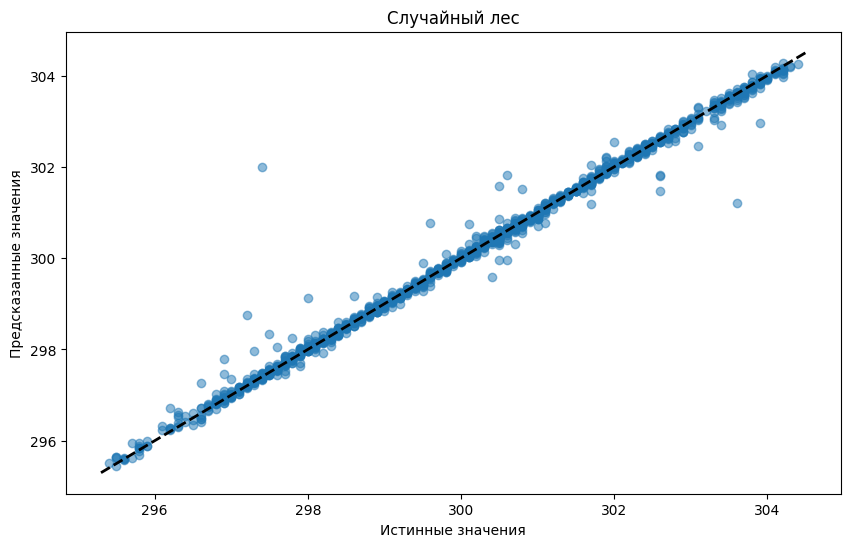

In [32]:
# Случайный лес
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42)
gs_rf = GridSearchCV(rf, rf_params, cv=3, scoring='r2')
gs_rf.fit(X_train_pca, y_train)
best_rf = gs_rf.best_estimator_
y_pred = best_rf.predict(X_test_pca)

new_row = pd.DataFrame([add_results('Random Forest', y_test, y_pred, gs_rf.best_params_)])
results_df = pd.concat([results_df, new_row], ignore_index=True)

# Метрики
print(f"\n--- Random Forest ---")
print(f"Лучшие параметры: {gs_rf.best_params_}")
print(f"R2: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred):.4f}")

# График
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Случайный лес')
plt.show()


--- Gradient Boosting ---
Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
R2: 0.9933
MAE: 0.0809
MSE: 0.0266
RMSE: 0.1631
MAPE: 0.0003


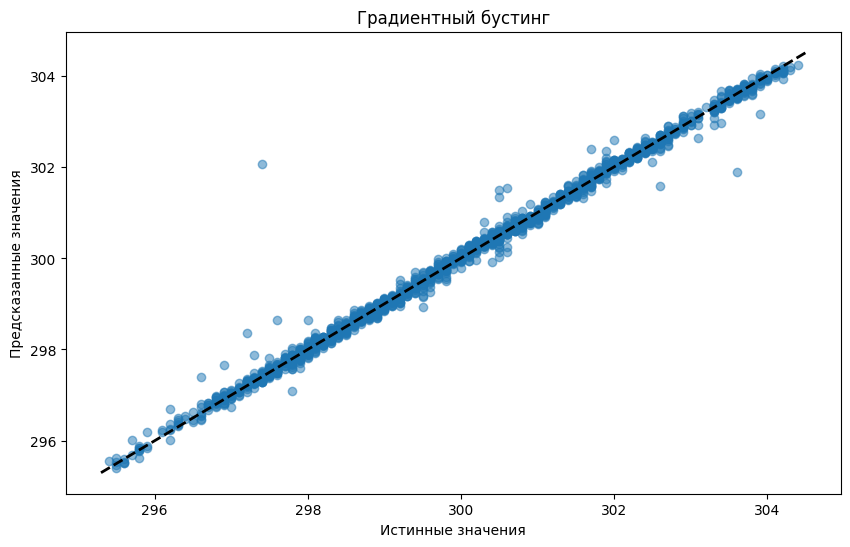

In [33]:
# Градиентный бустинг
gb_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

gb = GradientBoostingRegressor(random_state=42)
gs_gb = GridSearchCV(gb, gb_params, cv=3, scoring='r2')
gs_gb.fit(X_train_pca, y_train)
best_gb = gs_gb.best_estimator_
y_pred = best_gb.predict(X_test_pca)

new_row = pd.DataFrame([add_results('Gradient Boosting', y_test, y_pred, gs_gb.best_params_)])
results_df = pd.concat([results_df, new_row], ignore_index=True)

# Метрики
print(f"\n--- Gradient Boosting ---")
print(f"Лучшие параметры: {gs_gb.best_params_}")
print(f"R2: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred):.4f}")

# График
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Градиентный бустинг')
plt.show()

Fitting 3 folds for each of 8 candidates, totalling 24 fits

--- Stacking ---
Лучшие параметры базовых моделей:
Ridge: alpha=0.01
Lasso: alpha=0.001
Random Forest: n_estimators=100, max_depth=15

Лучшие параметры финального оценщика:
n_estimators: 100
learning_rate: 0.1
max_depth: 5

Метрики на тестовой выборке:
R2: 1.0000
MAE: 0.0000
MSE: 0.0000
RMSE: 0.0001
MAPE: 0.0000


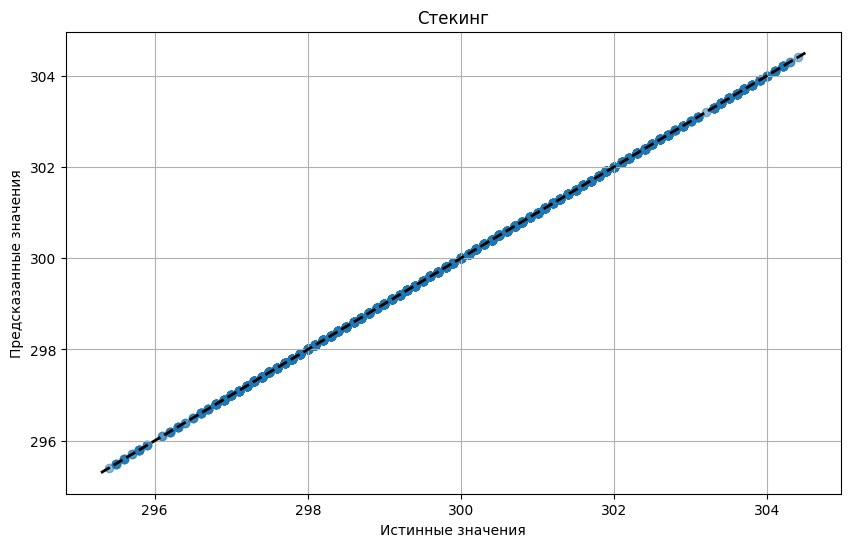

In [34]:
# Стекинг
base_models = [
    ('ridge', Ridge()),
    ('lasso', Lasso()),
    ('rf', RandomForestRegressor(random_state=42))
]

# Параметры для подбора базовых моделей
ridge_params = {'alpha': [0.01, 0.1]}
lasso_params = {'alpha': [0.001, 0.01]}
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [7, 15],
    'min_samples_split': [2, 5]
}

# Подбираем параметры для каждой базовой модели
ridge_gs = GridSearchCV(Ridge(), ridge_params, cv=3, scoring='r2')
ridge_gs.fit(X_train_pca, y_train)
best_ridge = ridge_gs.best_estimator_

lasso_gs = GridSearchCV(Lasso(), lasso_params, cv=3, scoring='r2')
lasso_gs.fit(X_train_pca, y_train)
best_lasso = lasso_gs.best_estimator_

rf_gs = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3, scoring='r2')
rf_gs.fit(X_train_pca, y_train)
best_rf = rf_gs.best_estimator_

# Обновляем список моделей с лучшими параметрами
base_models = [
    ('ridge', best_ridge),
    ('lasso', best_lasso),
    ('rf', best_rf)
]

# Параметры для финального оценщика
final_estimator_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

# Создаем и настраиваем стекинг-регрессор
stacking = StackingRegressor(
    estimators=base_models,
    final_estimator=GradientBoostingRegressor(random_state=42)
)

# Сетка параметров для стекинга
param_grid = {
    'final_estimator__n_estimators': final_estimator_params['n_estimators'],
    'final_estimator__learning_rate': final_estimator_params['learning_rate'],
    'final_estimator__max_depth': final_estimator_params['max_depth']
}

# Подбираем параметры для стекинга
stacking_gs = GridSearchCV(
    estimator=stacking,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)
stacking_gs.fit(X_train_pca, y_train)

# Лучшая модель
best_stacking = stacking_gs.best_estimator_
y_pred = best_stacking.predict(X_test_pca)
new_row = pd.DataFrame([{
    'Model': 'Stacking (PCA)',
    'R2': r2_score(y_test, y_pred),
    'MAE': mean_absolute_error(y_test, y_pred),
    'MSE': mean_squared_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAPE': mean_absolute_percentage_error(y_test, y_pred),
    'Best Parameters': str(stacking_gs.best_params_)
}])
results_df = pd.concat([results_df, new_row], ignore_index=True)

# Выводим лучшие параметры
print("\n--- Stacking ---")
print("Лучшие параметры базовых моделей:")
print(f"Ridge: alpha={best_ridge.alpha}")
print(f"Lasso: alpha={best_lasso.alpha}")
print(f"Random Forest: n_estimators={best_rf.n_estimators}, max_depth={best_rf.max_depth}")

print("\nЛучшие параметры финального оценщика:")
print(f"n_estimators: {best_stacking.final_estimator_.n_estimators}")
print(f"learning_rate: {best_stacking.final_estimator_.learning_rate}")
print(f"max_depth: {best_stacking.final_estimator_.max_depth}")

# Метрики
print("\nМетрики на тестовой выборке:")
print(f"R2: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred):.4f}")

# График
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Стекинг')
plt.grid(True)
plt.show()

Fitting 3 folds for each of 8 candidates, totalling 24 fits

--- Bagging ---
Лучшие параметры модели:
max_features: 0.7
max_samples: 0.7
n_estimators: 20

Метрики качества на тестовой выборке:
R2: 0.9902
MAE: 0.0893
MSE: 0.0391
RMSE: 0.1977
MAPE: 0.0003


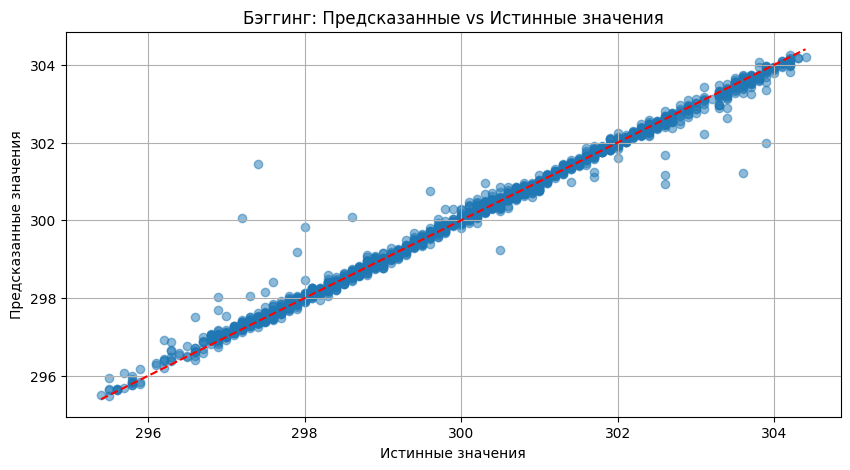

In [35]:
# Бэггинг
# Параметры для GridSearch
bagging_params = {
    'n_estimators': [10, 20],
    'max_samples': [0.5, 0.7],
    'max_features': [0.5, 0.7]
}

# Базовый estimator
base_estimator = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

bagging = BaggingRegressor(
    estimator=base_estimator,
    random_state=42
)

# Поиск по сетке
gs_bagging = GridSearchCV(bagging, bagging_params, cv=3, scoring='r2', n_jobs=-1, verbose=1)
gs_bagging.fit(X_train_pca, y_train)

best_bagging = gs_bagging.best_estimator_
y_pred = best_bagging.predict(X_test_pca)
new_row = pd.DataFrame([{
    'Model': 'Bagging',
    'R2': r2_score(y_test, y_pred),
    'MAE': mean_absolute_error(y_test, y_pred),
    'MSE': mean_squared_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAPE': mean_absolute_percentage_error(y_test, y_pred),
    'Best Parameters': str(gs_bagging.best_params_)
}])
results_df = pd.concat([results_df, new_row], ignore_index=True)

print("\n--- Bagging ---")
print("Лучшие параметры модели:")
for param, value in gs_bagging.best_params_.items():
    print(f"{param}: {value}")

print("\nМетрики качества на тестовой выборке:")
metrics = {
    'R2': r2_score(y_test, y_pred),
    'MAE': mean_absolute_error(y_test, y_pred),
    'MSE': mean_squared_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAPE': mean_absolute_percentage_error(y_test, y_pred)
}

for name, value in metrics.items():
    print(f"{name}: {value:.4f}")

# График предсказанных vs истинных значений
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Бэггинг: Предсказанные vs Истинные значения')
plt.grid(True)
plt.show()

In [37]:
# Сводка метрик

results_df = results_df.sort_values('R2', ascending=False).reset_index(drop=True)

print("Сводная таблица метрик всех моделей:")
display(results_df.style
       .format({
           'MSE': '{:.4f}',
           'R2': '{:.4f}',
           'MAE': '{:.4f}',
           'RMSE': '{:.4f}',
           'MAPE': '{:.2%}'
       }))

Сводная таблица метрик всех моделей:


,Model,MSE,R2,MAE,RMSE,MAPE,Best Parameters
0,Stacking (PCA),0.0000,1.0000,0.0000,0.0001,0.00%,"{'final_estimator__learning_rate': 0.1, 'final_estimator__max_depth': 5, 'final_estimator__n_estimators': 100}"
1,Ridge,0.0000,1.0000,0.0027,0.0033,0.00%,{'alpha': 0.01}
2,Ridge,0.0000,1.0000,0.0027,0.0033,0.00%,{'alpha': 0.01}
3,ElasticNet,0.0002,0.9999,0.0129,0.0157,0.00%,"{'alpha': 0.01, 'l1_ratio': 0.1}"
4,ElasticNet,0.0002,0.9999,0.0129,0.0157,0.00%,"{'alpha': 0.01, 'l1_ratio': 0.1}"
5,Lasso,0.0007,0.9998,0.0210,0.0267,0.01%,{'alpha': 0.01}
6,Lasso,0.0007,0.9998,0.0210,0.0267,0.01%,{'alpha': 0.01}
7,Gradient Boosting,0.0266,0.9933,0.0809,0.1631,0.03%,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}"
8,Random Forest,0.0268,0.9932,0.0565,0.1638,0.02%,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}"
9,Bagging,0.0391,0.9902,0.0893,0.1977,0.03%,"{'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 20}"


In [38]:
# Деплой лучшей модели
from joblib import dump

# Сохранение
joblib.dump(best_tree, 'tree_model.pkl')

['tree_model.pkl']

In [39]:
# Сохраняем модель и преобразователи
import joblib
joblib.dump({'model': best_tree, 'pca': pca, 'scaler': scaler}, 'model.pkl')

# Загружаем модель
loaded = joblib.load('model.pkl')

# Подготовка данных для прогноза (пример)
new_data = np.array([[1.5, 0.8, 0, 310, 1500, 45, 0, 0, 0, 0, 0]])  # значения

# Делаем прогноз
scaled_data = loaded['scaler'].transform(new_data)
pca_data = loaded['pca'].transform(scaled_data)
prediction = loaded['model'].predict(pca_data)[0]

print(f"Прогнозируемая температура: {prediction:.2f} K")

Прогнозируемая температура: 297.12 K
